In [2]:
import numpy as np
import pandas as ps
from scipy import linalg

#y" + g(x)*y' + h(x)*y = f(x)
def g(x):
    return x*x - 3
def h(x):
    return (x*x - 3)*np.cos(x)
def f(x):
    return 2 - 6*x + 2*x**3 + (x**2 - 3)*np.exp(x)*np.sin(x)*(1 + np.cos(x)) + np.cos(x)*(np.exp(x) + (x**2 - 1) + x**4 - 3*x**2)


#ф-я function принимает на вход граничные условия и число узлов равное n
def function(x0,y0,xN,yN,n):
    #решение ДУ
    x = np.linspace(x0,xN,n) 
    tau = x[1]-x[0]
    
    #  y_n+1 * a_n + y_n * b_n + y_n-1 * c_n = d_n
    a = 1 + g(x)*tau
    b = -2 - g(x)*tau + h(x)*tau*tau
    c = 1
    F = tau**2*f(x) # = d_n
    F[0] = y0
    F[n-1] = yN

    #Ax=F
    A = np.zeros((n,n))
    A[0][0] = 1
    A[n-1][n-1] = 1
    #i - номер строки
    for i in range(1,n-1):
        A[i][i-1] = a[i]
        A[i][i] = b[i]
        A[i][i+1] = c
    y = linalg.solve(A,F)
    
    return [x,y]

In [9]:
import pandas as ps
array = np.zeros((2,6))
array[0] = np.linspace(0.5,3,6)
array[1] = np.interp(array[0], function(0,0,np.pi,np.pi**2,100)[0], function(0,0,np.pi,np.pi**2,100)[1])
table = ps.DataFrame(data=array, index=np.arange(0,2), columns=np.arange(0,6))
table.index = ['x','y']
table

,0,1,2,3,4,5
x,0.500000,1.000000,1.500000,2.000000,2.500000,3.000000
y,3.253536,4.298516,4.022308,3.261493,3.490472,6.614975


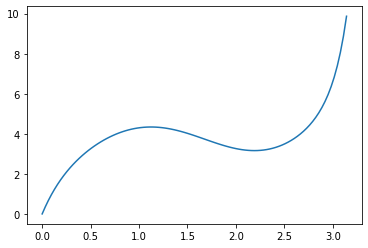

In [5]:
import matplotlib.pyplot as plt
plt.plot(function(0,0,np.pi,np.pi**2,100)[0],function(0,0,np.pi,np.pi**2,100)[1])